# Natural Language Processing 

<div class="alert alert-success">
Natural Language Processing (NLP) is the approach of analyzing text data.
</div>

<div class="alert alert-info">
Natural Language Processing on 
<a href="https://en.wikipedia.org/wiki/Natural-language_processing" class="alert-link">wikipedia</a>.
</div>

## NLTK: Natural Language Tool Kit

<div class="alert alert-success">
NLTK is the main Python module for text-analysis. 
</div>

<div class="alert alert-info">
The NLTK organization website is 
<a href="http://www.nltk.org/" class="alert-link">here</a>
and you can download the data from them directly  
<a href="http://www.nltk.org/nltk_data/" class="alert-link">here</a>.
</div>



#### NLTK

NLTK provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries, and an active discussion forum. 

In [2]:
# Import NLTK
import nltk

On todays episode of .ipynb notebook, we will take a journey through some basic text-data analysis using the NLTK library.

When you work with text data, you need corpora -- or text datasets to compare to. NLTK has a bunch of corpora. But you have to install them by hand.
Here are some of the ones I use: `punkt`, `stopwords`, `averaged_perceptron_tagger`, `maxent_ne_chunker`, `words`, and `treebank`.

In [3]:
# Imports
%matplotlib inline

# Python has some useful string tools
import string

# Collections is a part of Python, with some useful data objects
from collections import Counter

import numpy as np
import matplotlib.pyplot as plt

# Scikit-learn has some useful NLP tools, such as a TFIDF vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
# Load the data
with open('book.txt', 'r') as f:
    sents = f.readlines()

In [5]:
# Check out the data - print out the first and last sentences, as examples
print(sents[0])
print(sents[-1])

the half-ling book one in the fall of igneeria series kaylee soderburg copyright 2013 kaylee soderburg all rights reserved .

alejo was sure the fact that he was nervously repeating mass along with five wrinkly , age-encrusted spanish women meant that stalin was rethinking whether he was going to pay the price .



In [7]:
# Tokenize all the sentences into words
#  This collects all the word tokens together into one big list
tokens = []
for x in sents:
    tokens.extend(nltk.word_tokenize(x))

In [8]:
# Check out how many words are in the data
print('Number of words in the data: \t', len(tokens))
print('Number of unique words: \t', len(set(tokens)))

Number of words in the data: 	 140060
Number of unique words: 	 8221


In [9]:
# Use the 'counter' object to count how many times each word appears
counts = Counter(tokens)

In [10]:
# Check out the counts object
#  This is basically a 'bag-of-words' representation of this corpus
#  We have lost word order and grammar - it's just a collection of words
#  What we do have is a list of all the words present, and how often they appear
counts

Counter({'the': 6062,
         'half-ling': 22,
         'book': 21,
         'one': 411,
         'in': 1616,
         'fall': 18,
         'of': 2122,
         'igneeria': 30,
         'series': 2,
         'kaylee': 2,
         'soderburg': 2,
         'copyright': 2,
         '2013': 1,
         'all': 410,
         'rights': 2,
         'reserved': 3,
         '.': 8601,
         'isbn': 1,
         ':': 71,
         '1492913731': 1,
         'isbn-13': 1,
         '978-1492913733': 1,
         'for': 632,
         'my': 723,
         'family': 86,
         ',': 6675,
         'who': 255,
         'encouraged': 1,
         'me': 614,
         'to': 3328,
         'never': 137,
         'stop': 50,
         'fighting': 23,
         'dreams': 12,
         'chapter': 13,
         '1': 4,
         'summer': 5,
         'vacations': 1,
         'supposed': 37,
         'be': 510,
         'fun': 18,
         'right': 210,
         '?': 1153,
         'i': 2747,
         'wish': 7,
    

One thing you might notice if you scroll through the word list above is that it still contains punctuation. Let's remove those.

In [11]:
# The 'string' module has a useful list of punctuation
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [12]:
# Drop all punction markers from the counts object
for punc in string.punctuation:
    if punc in counts:
        counts.pop(punc)

In [13]:
# Get the top 10 most frequent words
top10 = counts.most_common(10)

In [14]:
# Extract the top words, and counts
top10_words = [it[0] for it in top10]
top10_counts = [it[1] for it in top10]

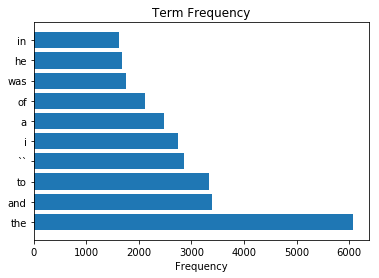

In [15]:
# Plot a barplot of the most frequent words in the text
plt.barh(top10_words, top10_counts)
plt.title('Term Frequency');
plt.xlabel('Frequency');

As we can see, 'the', 'was', 'a', etc. appear a lot in the document.

These frequently appearing words aren't really that useful to figure out what these documents are about, or as a way to use and understand this text data.

In [17]:
# Drop all stop words
for stop in nltk.corpus.stopwords.words('english'):
    if stop in counts:
        counts.pop(stop)

In [18]:
# Get the top 20 most frequent words, of the stopword-removed data
top20 = counts.most_common(20)

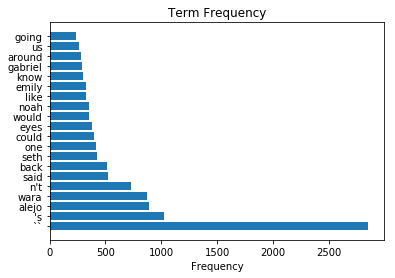

In [19]:
# Plot a barplot of the most frequent words in the text
plt.barh([it[0] for it in top20], [it[1] for it in top20])
plt.title('Term Frequency');
plt.xlabel('Frequency');

Let's explore using TFIDF.

In [20]:
# Initialize a TFIDF object
tfidf = TfidfVectorizer(analyzer='word',
                        sublinear_tf=True,
                        max_features=5000,
                        tokenizer=nltk.word_tokenize)

In [21]:
# Apply the TFIDF transformation to our data
#  Note that this takes the sentences, and tokenizes them, then applies TFIDF
tfidf_books = tfidf.fit_transform(sents).toarray()

The TfidfVectorizer will calculate the inverse document frequency (IDF) for each word.

The TFIDF is then calculated as the TF * IDF, working to down-weight frequently appearing words. This TFIDF is stored in `tfidf_books` variable, which is a `n_documents x n_words matrix` that encodes the documents in a TFIDF representation.

Let's first plot out the IDF for each of the top 10 most frequently appeared words (from the first analysis).

In [22]:
# Get the IDF weights for the top 10 most common words
IDF_weights = [tfidf.idf_[tfidf.vocabulary_[token]] for token in top10_words]

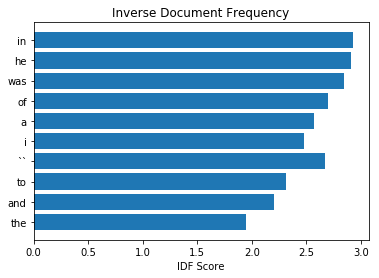

In [23]:
# Plot the IDF scores for the very common words
plt.barh(top10_words, IDF_weights)
plt.title('Inverse Document Frequency');
plt.xlabel('IDF Score');

We compare the plot with the following plot that shows the words with top 10 highest IDF.

In [24]:
# Get the words with the highest IDF score
inds = np.argsort(tfidf.idf_)[::-1][:10]
top_IDF_tokens = [list(tfidf.vocabulary_)[ind] for ind in inds]
top_IDF_scores = tfidf.idf_[inds]

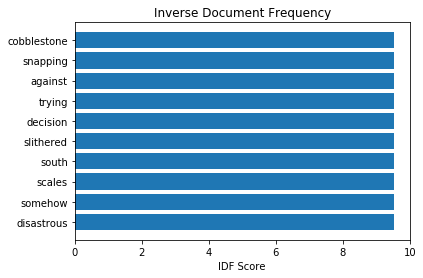

In [25]:
# Get the words with the highest IDF score
plt.barh(top_IDF_tokens, top_IDF_scores)
plt.title('Inverse Document Frequency');
plt.xlabel('IDF Score');

As we can see, the frequently appearing words in the document get very low IDF scores, as compared to much rarer words.

After TF-IDF, we successfully down-weight the frequently appearing words in the document. This allows us to represent a document by the words that are most unique to it, which can be a more useful way to represent text data.